In [1]:
# Khai báo thư viện cần dùng
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Khai báo thư viện cần dùng
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
# đọc dữ liệu từ file churn_rate_prediction
df = pd.read_csv("churn_rate_prediction.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
# In ra 5 dòng dữ liệu cuối
df.tail()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3
36991,fffe43004900440033003600340034003200,Verlene Beaulieu,35,M,LBX0GLR,Town,Silver Membership,2015-10-23,No,xxxxxxxx,...,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,2


In [5]:
# Thống kê các giá trị count, mean, std, 25%, 50%,75% để chuẩn bị cho bước xử lý outliers
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [6]:
# Xem định dạng kiểu dữ liệu của mỗi cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

## Data Analysis

In [7]:
# Lấy ra các cột categorical và numerical
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [8]:
# thống kê các giá trị null trong cột categorical
df[categorical_cols].isnull().sum()

customer_id                        0
Name                               0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
avg_frequency_login_days           0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [9]:
# Thống kê các giá trị null trong cột numerical
df[numerical_cols].isnull().sum()

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
points_in_wallet         3443
churn_risk_score            0
dtype: int64

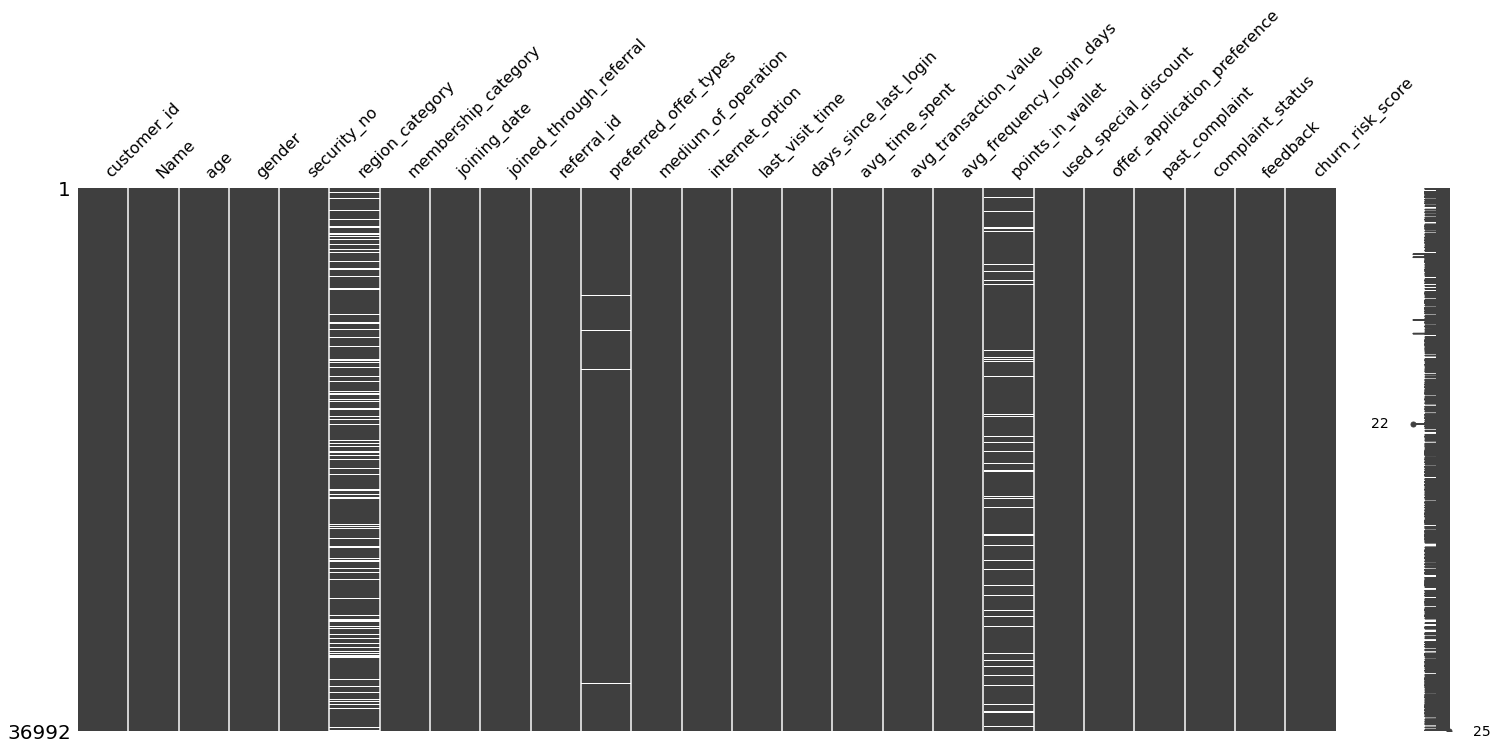

In [10]:
# Visualize missing values bằng matrix
msno.matrix(df);

## Preprocessing

In [11]:
# Loại bỏ cột customer id, name, security_no và last_visit_time vì có quá nhiều giá trị khác nhau trong 1 cộtt
def preprocessing_data(df):
    cols_to_drop = ["customer_id", "Name", "security_no", "last_visit_time"]
    for col in cols_to_drop:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
    df.drop_duplicates(inplace=True)
    return df

In [12]:
# In ra kết quả của hàm trên
df = preprocessing_data(df.copy())

In [13]:
# Kiểm tra lại xem các cột nêu trên đã được bỏ chưa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   referral_id                   36992 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           36992 non-null  object 
 9   internet_option               36992 non-null  object 
 10  days_since_last_login         36992 non-null  int64  
 11  avg_time_spent                36992 non-null  float64
 12  avg_transaction_value         36992 non-null  float64
 13  a

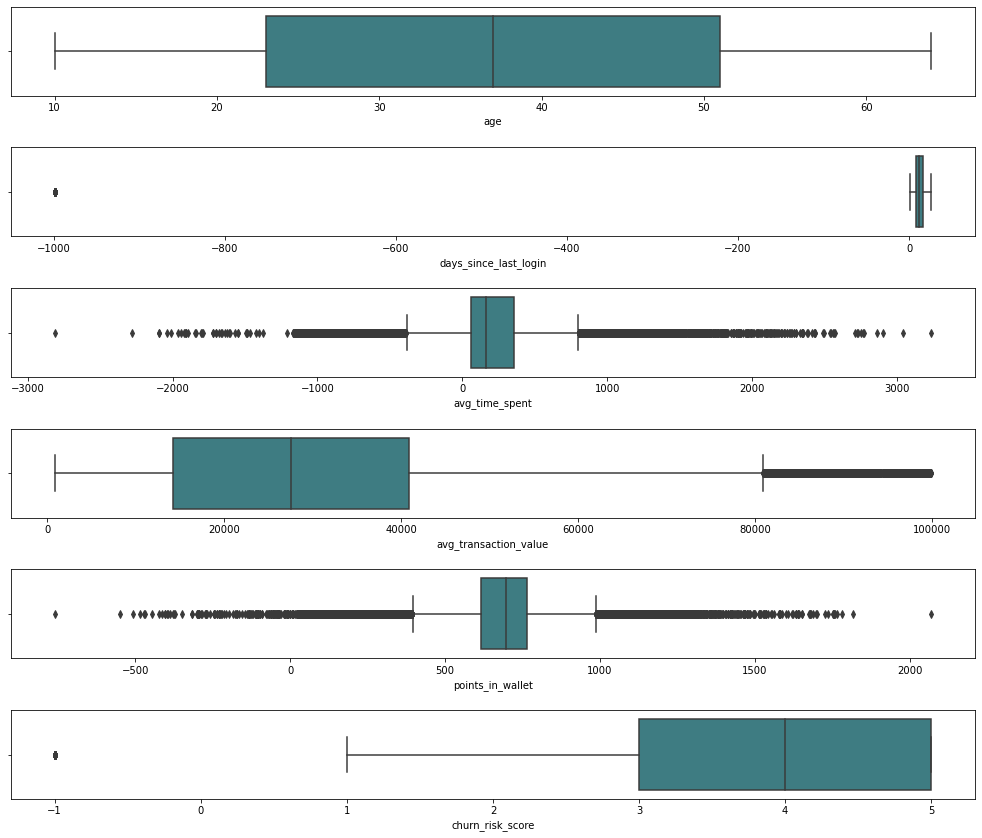

In [14]:
# Vẽ boxplot để check các giá trị outliers
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

## Feature Engineering

## Xử lý outliers

In [15]:
# Thống kê các giá trị outliers trong mỗi cột
for col in df.select_dtypes(exclude='O').columns:
    descc = df[col].describe()
    Q1 = descc['25%']
    Q3 = descc['75%']
    IQR = Q3 - Q1
    threshold = 1.5*IQR
    outliers = df[(df[col] < (Q1 - threshold)) | (df[col] > (Q3 + threshold))]
    print("Outliers in "+col+":\n", outliers[col])

Outliers in age:
 Series([], Name: age, dtype: int64)
Outliers in days_since_last_login:
 15      -999
57      -999
70      -999
74      -999
113     -999
        ... 
36891   -999
36921   -999
36940   -999
36953   -999
36959   -999
Name: days_since_last_login, Length: 1999, dtype: int64
Outliers in avg_time_spent:
 28       -936.744818
41       -930.207844
60       -615.344319
79       -687.629574
85       1316.520000
            ...     
36938    1315.328048
36947    1457.241569
36956    -746.034591
36987    -650.682759
36988    -638.123421
Name: avg_time_spent, Length: 4677, dtype: float64
Outliers in avg_transaction_value:
 43       94100.72
48       86433.91
164      83453.57
210      95625.40
230      97643.81
           ...   
36793    98038.51
36876    82520.18
36900    86920.32
36966    89328.20
36980    99162.86
Name: avg_transaction_value, Length: 1131, dtype: float64
Outliers in points_in_wallet:
 15        141.513201
19        164.800769
22        389.356443
24        225.

In [16]:
# Tạo dataframe mới chỉ chứa các cột (features) số
numerical_df = df[numerical_cols]

In [17]:
# Tính IQR cho các cột dữ liệu (features)
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Lấy danh sách các features có giá trị ngoại lệ
outliers = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any()
outliers_features = list(outliers[outliers == True].index)

# In ra các features có giá trị ngoại lệ
print("Các features có giá trị ngoại lệ là: ", outliers_features)

Các features có giá trị ngoại lệ là:  ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [18]:
# Thay thế các giá trị outliers dưới 25% thành giá trị cận biên dưới, và các giá trị outliers trên 75% thành các giá trị cận biên trên
def remove_outliers(numerical_df,outliers_features):
    # create copy of dataframe
    
    data = numerical_df.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

In [19]:
# In ra kết quả của việc xử lý các giá trị outliers
df = remove_outliers(df,outliers_features)

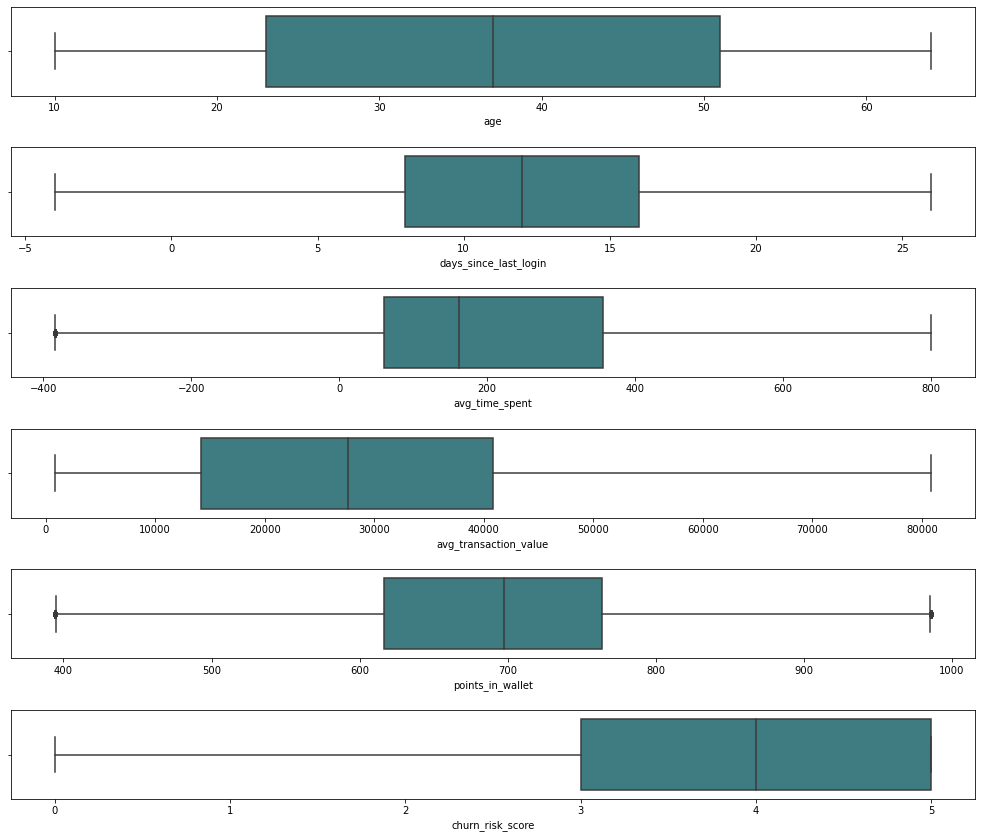

In [20]:
# Sử dụng box plot để show các cột đã được loại bỏ outlier hoàn toàn
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

## Xử lý missing values

In [21]:
# Hàm vừa fill missing value và gộp 2 cột joining date và days since last login
def apply_feature_engineering(df):
    df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')
    df['joining_date'] = pd.to_datetime(df['joining_date'],format='%Y-%m-%d')
    for col in ['avg_frequency_login_days', 'avg_time_spent']:
        df.loc[df[col] < 0, col] = 0
    # Fill missing values
    df["region_category"] = df["region_category"].fillna(df["region_category"].mode()[0])
    df["preferred_offer_types"] = df["preferred_offer_types"].fillna(df["preferred_offer_types"].mode()[0])
    df["points_in_wallet"] = df["points_in_wallet"].fillna(df["points_in_wallet"].mean())
    df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].median())
    df["churn_risk_score"] = df["churn_risk_score"].replace(-1, 0)
    df['joined_through_referral'] = df['referral_id'].apply(lambda x:'No' if x=='xxxxxxxx' else 'Yes')
    df['joined_days'] = df['joining_date'].apply(lambda x: int(str(pd.to_datetime('2021-03-16',format='%Y-%m-%d')-x).split()[0]))\
                        - df['days_since_last_login']
    cols_to_drop = ['joining_date', "referral_id", "complaint_status"]
    for col in cols_to_drop:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
    df['avg_transaction_value'] = df['avg_transaction_value'].apply(lambda x: 'High' if x > 50000 else 'Low')
    # df["age"] = df["age"].apply(lambda x: "Child" if x < 18 else "Working" if x < 55 else "Retired")
    df['membership_category'] = df['membership_category'].map({'No Membership':0,
                                                            'Basic Membership':1,
                                                            'Silver Membership':2,
                                                            'Gold Membership':3,
                                                            'Premium Membership':4,
                                                            'Platinum Membership':5 })
    df = pd.get_dummies(df, columns = ['avg_transaction_value',
                                       'gender',
                                       'region_category',
                                       'internet_option',
                                       'medium_of_operation',
                                       'preferred_offer_types',
                                       'joined_through_referral',
                                       'used_special_discount',
                                       'offer_application_preference',
                                       'past_complaint',
                                       'feedback'])
    return df

In [22]:
# In 5 dòng kết quả của hàm trên
df = apply_feature_engineering(df)
df.head()

,age,membership_category,days_since_last_login,avg_time_spent,avg_frequency_login_days,points_in_wallet,churn_risk_score,joined_days,avg_transaction_value_High,avg_transaction_value_Low,...,past_complaint_Yes,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,5,17,300.63,17.0,781.750000,2,1290,True,False,...,False,False,False,False,False,True,False,False,False,False
1,32,4,16,306.34,10.0,687.426315,1,1280,False,True,...,True,False,False,False,False,False,True,False,False,False
2,44,0,14,516.16,22.0,500.690000,5,1572,False,True,...,True,False,False,False,True,False,False,False,False,False
3,37,0,11,53.27,6.0,567.660000,5,1588,False,True,...,True,False,False,False,True,False,False,False,False,False
4,31,0,20,113.13,16.0,663.060000,5,1261,False,True,...,True,False,False,False,True,False,False,False,False,False


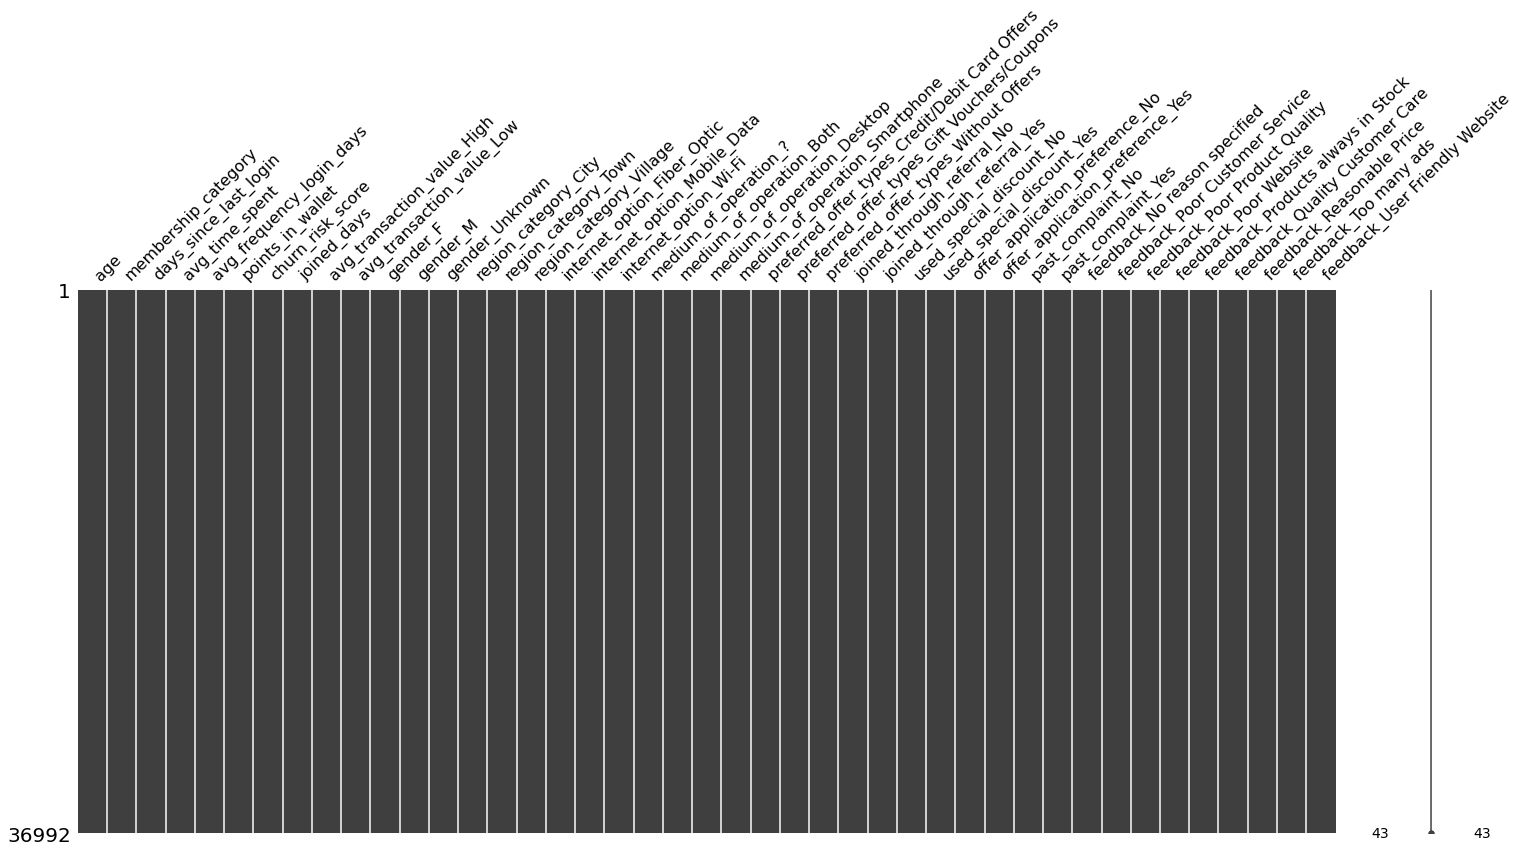

In [23]:
# Visualize giá trị missing values sau khi filling chúng
msno.matrix(df);

<AxesSubplot:>

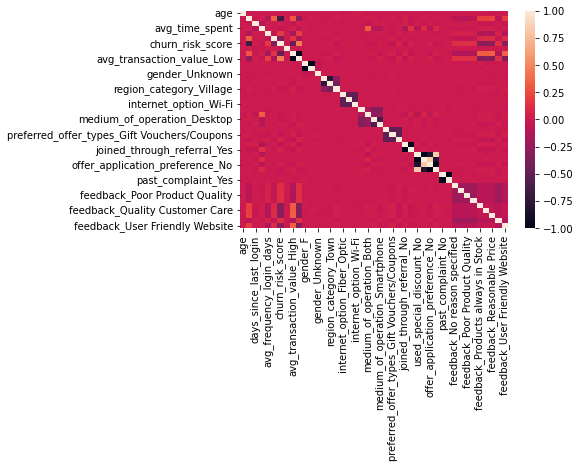

In [24]:
sns.heatmap(df.corr()) # Show heatmap after normalized data

## Prepare the data

In [25]:
# Chọn churn risk score làm biến mục tiêu
def prepare_X_y(df):
    X = df.drop('churn_risk_score', axis=1)
    y = df["churn_risk_score"]
    return X, y

X, y = prepare_X_y(df)

## Apply machine learning model

### Train-test split

In [26]:
# chia tập train 80%, test 20% với random state là 42
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
RANDOM_STATE = 42
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE, stratify=y)

### Build model

In [27]:
# Khai báo thư viện cần dùng
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn.pipeline import Pipeline
def build_model(X, y, model_param=None):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("model", SVC())
        ]
    )
    if model_param is None:
        pipeline.fit(X, y)
        return pipeline

    cv = StratifiedKFold(n_splits=3)
    param_grid = {'model__' + key: model_param[key] for key in model_param}
    best_pipeline = RandomizedSearchCV(pipeline, param_grid, refit=True, cv=cv,
                                       scoring='precision', n_jobs=-1, random_state=25)
    best_pipeline.fit(X, y)
    print(best_pipeline.best_params_)
    return best_pipeline

In [31]:
def calculate_performance(y_true, y_pred):
    return classification_report(y_true, y_pred)

model_param = {
    "kernel": ["linear", "rbf", "poly"],
    "gamma":['scale']
}
model = build_model(trainX, trainY, model_param)
# print(model.best_params_)
pred = model.predict(testX)

{'model__kernel': 'linear', 'model__gamma': 'scale'}


In [32]:
print(calculate_performance(testY, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       233
           1       0.57      0.65      0.61       530
           2       0.61      0.56      0.58       548
           3       0.74      0.77      0.76      2085
           4       0.48      0.38      0.42      2037
           5       0.66      0.83      0.73      1966

    accuracy                           0.63      7399
   macro avg       0.51      0.53      0.52      7399
weighted avg       0.60      0.63      0.61      7399



In [34]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay

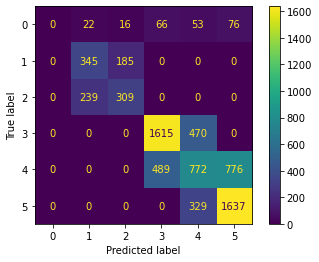

In [37]:
# ConfusionMatrix plot
ConfusionMatrixDisplay.from_predictions(testY,pred)